In [19]:
from bs4 import BeautifulSoup  
import pandas as pd

In [37]:
file = open("passengers.xml",'r')
contents = file.read()


In [38]:
soup = BeautifulSoup(contents,'xml')
file.close()

In [22]:
persons = soup.find_all("person")
print("Passengers found: ", len(persons))

Passengers found:  900


In [23]:
persons[0]

<person desiredDepart="0.00" dest="-1212" detourDistance="-4.94" detourDistancePerc="-0.16" detourTime="-17" detourTimePerc="-5.82" id="p0" mode="taxi" orig="-4479" privateArrival="292.00" privateDepart="0.00" privateDepartDelay="0.00" privateDuration="292.00" privateRouteLength="3016.87" sharedRide="False" taxiArrival="313" taxiDepart="38" taxiDepartDelay="38" taxiDuration="275.00" taxiRouteLength="3011.93" taxiVehicle="t26" taxiWaitingTime="38.00"/>

In [24]:
print(persons[0]["dest"])

-1212


In [25]:
data = []
for person in persons:
    id = person["id"]
    privateDuration = float(person["privateDuration"])
    taxiDuration = float(person["taxiDuration"])
    detourTime = float(person["detourTime"])
    detourTimePerc = float(person["detourTimePerc"])
    privateRouteLength = float(person["privateRouteLength"])
    taxiRouteLength = float(person["taxiRouteLength"])
    detourDistance = float(person["detourDistance"])
    detourDistancePerc = float(person["detourDistancePerc"])
    sharedRide = person["sharedRide"]
    taxiDepartDelay = int(float(person["taxiDepartDelay"]))
    mode = person["mode"]
    rows = [id, privateDuration, taxiDuration, detourTime, detourTimePerc, privateRouteLength, taxiRouteLength, detourDistance, detourDistancePerc,  sharedRide, taxiDepartDelay, mode]
    data.append(rows)

df = pd.DataFrame(data, columns=['id', 'privateDuration', 'taxiDuration', 'detourTime', 'detourTimePerc', 'privateDistance', 'taxiDistance', 'detourDistance', 'detourDistancePerc',  'sharedRide', 'taxiDepartDelay', 'mode'])

In [26]:
df["taxiTripTime"] = df["taxiDuration"] + df["taxiDepartDelay"]
df["taxiPrivateCoeff"] = round((df["taxiTripTime"] - df["privateDuration"]) / df["privateDuration"] * 100, 2)

In [27]:
display(df)

,id,privateDuration,taxiDuration,detourTime,detourTimePerc,privateDistance,taxiDistance,detourDistance,detourDistancePerc,sharedRide,taxiDepartDelay,mode,taxiTripTime,taxiPrivateCoeff
0,p0,292.0,275.0,-17.0,-5.82,3016.87,3011.93,-4.94,-0.16,False,38,taxi,313.0,7.19
1,p1,193.0,221.0,28.0,14.51,2254.21,2249.27,-4.94,-0.22,False,45,taxi,266.0,37.82
2,p2,281.0,264.0,-17.0,-6.05,2977.47,2972.56,-4.91,-0.16,False,36,taxi,300.0,6.76
3,p3,169.0,219.0,50.0,29.59,2084.20,2079.20,-5.00,-0.24,False,18,taxi,237.0,40.24
4,p4,166.0,217.0,51.0,30.72,1994.16,1989.20,-4.96,-0.25,False,45,taxi,262.0,57.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,894,277.0,310.0,33.0,11.91,3477.55,3483.11,5.56,0.16,False,0,private,310.0,11.91
896,895,217.0,240.0,23.0,10.60,2638.79,2638.79,0.00,0.00,False,0,private,240.0,10.60
897,896,238.0,208.0,-30.0,-12.61,2640.74,2640.74,0.00,0.00,False,1,private,209.0,-12.18
898,897,290.0,296.0,6.0,2.07,3141.36,3141.36,0.00,0.00,False,0,private,296.0,2.07


In [28]:
df_shared = df[(df["sharedRide"] == "True") & (df["mode"]=="taxi")]
df_nonshared = df[(df["sharedRide"] == "False") & (df["mode"]=="taxi")]
df_private = df[df["mode"] == "private"]

In [29]:
df_shared.quantile(q=[0.25, 0.5, 0.75], axis=0, numeric_only=True)

,privateDuration,taxiDuration,detourTime,detourTimePerc,privateDistance,taxiDistance,detourDistance,detourDistancePerc,taxiDepartDelay,taxiTripTime,taxiPrivateCoeff
0.25,225.0,255.5,33.25,14.7825,2410.3750,2629.4925,110.4450,4.460,169.5,423.0,98.6225
0.50,243.0,277.5,46.00,19.8150,2615.5050,2901.2150,314.7350,12.020,195.5,481.0,108.1000
0.75,272.5,323.0,71.00,26.8700,2897.8225,3251.8575,410.1175,14.035,383.0,689.5,180.6075


In [30]:
df_nonshared.quantile(q=[0.25, 0.5, 0.75], axis=0, numeric_only=True)

,privateDuration,taxiDuration,detourTime,detourTimePerc,privateDistance,taxiDistance,detourDistance,detourDistancePerc,taxiDepartDelay,taxiTripTime,taxiPrivateCoeff
0.25,207.5,215.0,-17.0,-6.215,2329.625,2329.480,-4.985,-0.230,47.0,301.0,22.29
0.50,243.0,251.0,5.0,2.270,2561.090,2556.100,-4.950,-0.200,88.0,340.0,41.47
0.75,279.0,283.0,26.5,11.310,2964.690,2961.715,-4.925,-0.165,168.0,428.5,71.08


In [31]:
df_private.quantile(q=[0.25, 0.5, 0.75], axis=0, numeric_only=True)


,privateDuration,taxiDuration,detourTime,detourTimePerc,privateDistance,taxiDistance,detourDistance,detourDistancePerc,taxiDepartDelay,taxiTripTime,taxiPrivateCoeff
0.25,209.5,212.0,-21.0,-8.465,2291.445,2296.100,0.0,0.0,0.0,213.0,-8.43
0.50,241.0,246.0,2.0,1.060,2591.280,2588.390,0.0,0.0,0.0,247.0,1.35
0.75,279.5,283.5,24.0,10.440,2904.545,2897.165,0.0,0.0,0.0,284.0,10.63


In [32]:
df.sharedRide.value_counts()

False    890
True      10
Name: sharedRide, dtype: int64

array([[<AxesSubplot:title={'center':'privateDuration'}>,
        <AxesSubplot:title={'center':'taxiTripTime'}>]], dtype=object)

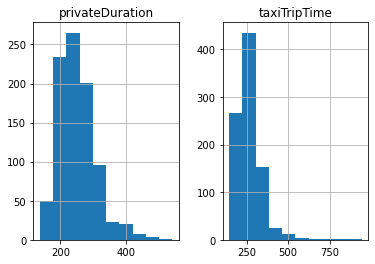

In [33]:
df.hist(column=["privateDuration", "taxiTripTime"])

array([[<AxesSubplot:title={'center':'detourTime'}>,
        <AxesSubplot:title={'center':'taxiDepartDelay'}>]], dtype=object)

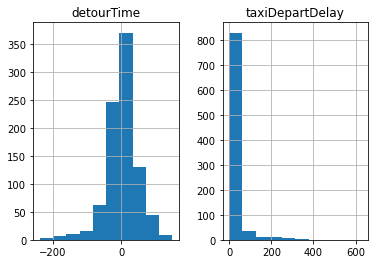

In [34]:
df.hist(column=["detourTime", "taxiDepartDelay"])

array([<AxesSubplot:title={'center':'False'}>,
       <AxesSubplot:title={'center':'True'}>], dtype=object)

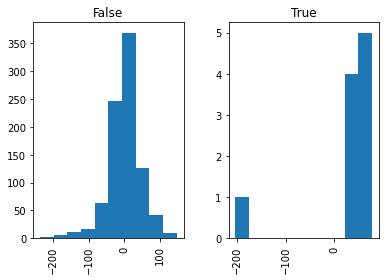

In [35]:
df.hist(column=["detourTime"], by="sharedRide")

array([<AxesSubplot:title={'center':'False'}>,
       <AxesSubplot:title={'center':'True'}>], dtype=object)

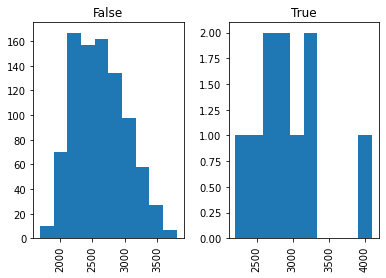

In [36]:
df.hist(column=["taxiDistance"], by="sharedRide")